# 1. Study the data set

In [ ]:
!pip install tensorflow[and-cuda]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression  
import seaborn as sns 
import pandas as pd


In [ ]:
# Load data
data = pd.read_csv('user_summary_only_mocks.csv')

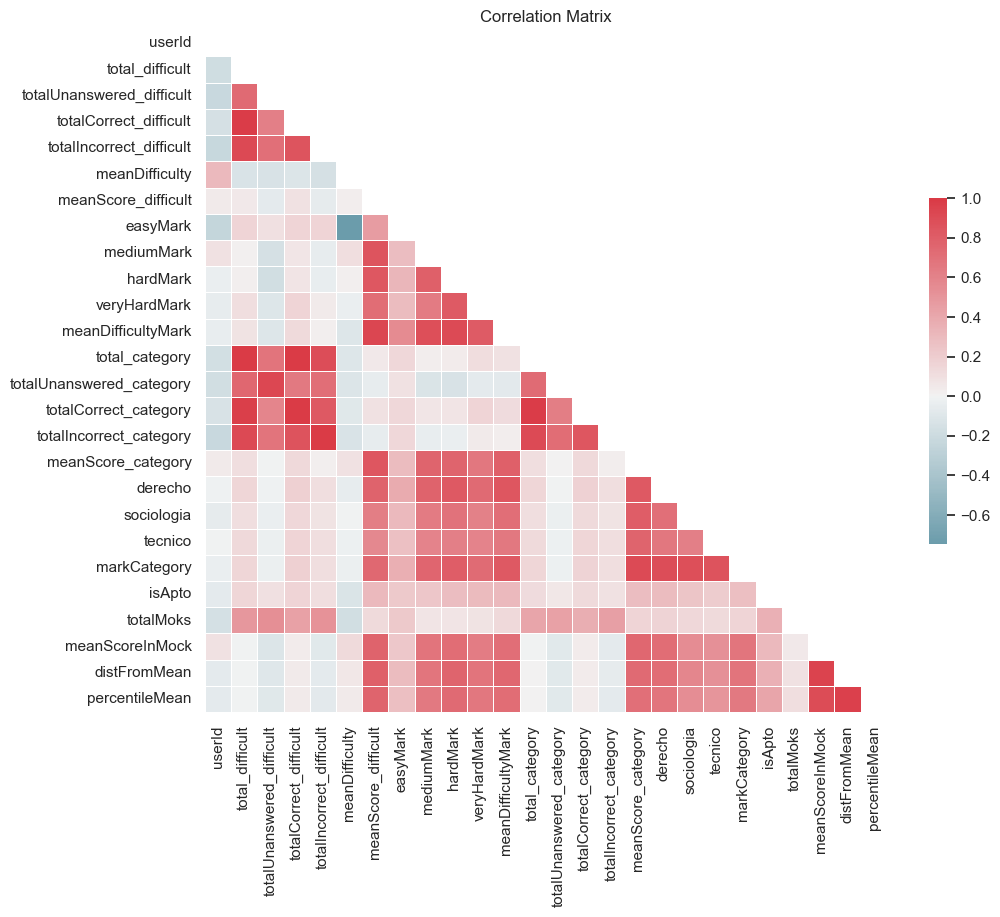

In [5]:
# Plot a heatmap of the data

# Create a heatmap
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()



In [6]:
data.columns

Index(['userId', 'total_difficult', 'totalUnanswered_difficult',
       'totalCorrect_difficult', 'totalIncorrect_difficult', 'meanDifficulty',
       'meanScore_difficult', 'easyMark', 'mediumMark', 'hardMark',
       'veryHardMark', 'meanDifficultyMark', 'total_category',
       'totalUnanswered_category', 'totalCorrect_category',
       'totalIncorrect_category', 'meanScore_category', 'derecho',
       'sociologia', 'tecnico', 'markCategory', 'isApto', 'totalMoks',
       'meanScoreInMock', 'distFromMean', 'percentileMean'],
      dtype='object')

In [18]:
# Obtain the dataframe to modeling
variables_selected = [
    'meanScore_category',
    'meanDifficultyMark',
    'totalCorrect_category',
    'totalIncorrect_category',
    'markCategory',
    'percentileMean',
    'totalUnanswered_difficult',
    'totalCorrect_difficult', 
    'totalIncorrect_difficult', 
    'meanDifficulty',
    'meanScore_difficult',
    'easyMark', 
    'mediumMark', 
    'hardMark',
    'veryHardMark', 
    'meanDifficultyMark', 
    'total_category',
    'totalUnanswered_category', 
    'totalCorrect_category',
    'totalIncorrect_category', 
    'derecho',
    'sociologia', 
    'tecnico',
    'markCategory',

]

data_modeling = data[variables_selected]

In [10]:
data_modeling.shape

(1463, 6)

## Decision Tree

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 40}
Mean Squared Error (mejor modelo): 0.025456740317104834
R2 Score (mejor modelo): 0.5928813771474933


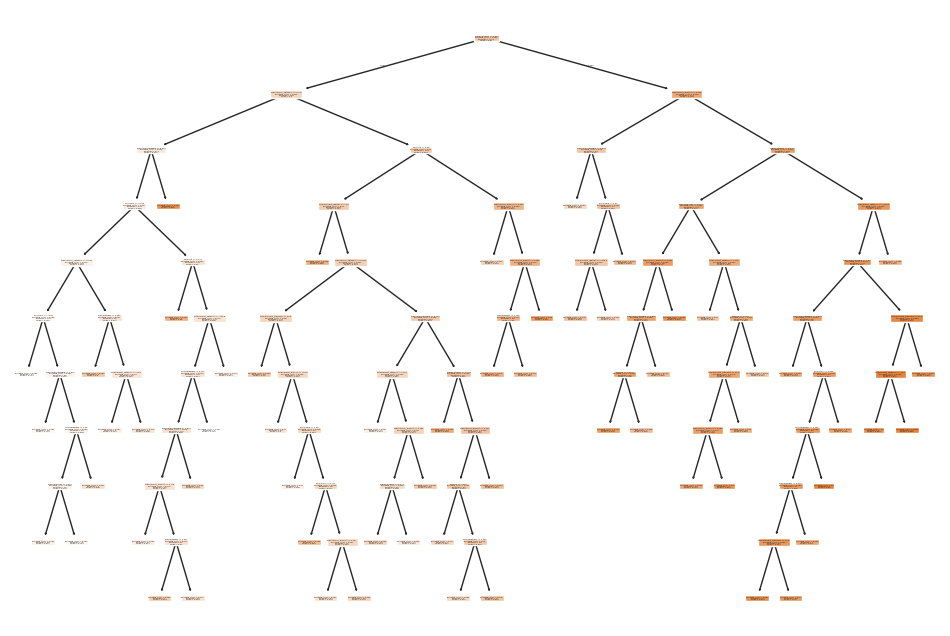

In [21]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Cargar los datos (reemplaza con tus datos)
# df = pd.read_csv('tus_datos.csv')
X = data_modeling.drop(columns=['percentileMean'])
y = data['percentileMean']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
tree_model = DecisionTreeRegressor(random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 10,20,30,40, None],
    'min_samples_split': [2, 5, 10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 5, 6, 7],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor modelo y parámetros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (mejor modelo):", mse)
print("R2 Score (mejor modelo):", r2)

# Opcional: Visualizar el árbol resultante
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X.columns, filled=True)
plt.show()


## Random Forest

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits
Mejores hiperparámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error (mejor modelo): 0.019287813394964094
R2 Score (mejor modelo): 0.6915383537177489


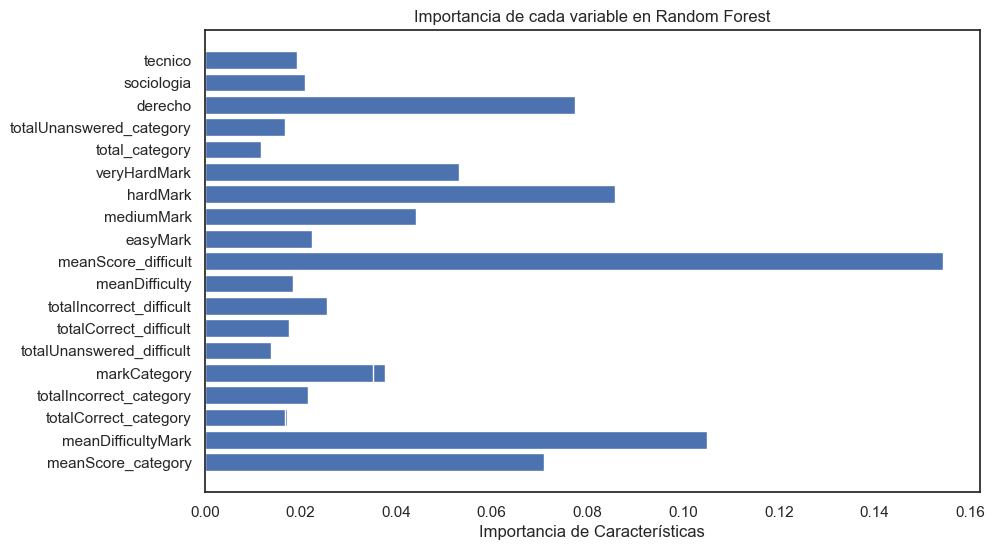

In [23]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Cargar los datos (reemplaza con tus datos)
# df = pd.read_csv('tus_datos.csv')
X = data_modeling.drop(columns=['percentileMean'])
y = data['percentileMean']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400],          # Número de árboles
    'max_depth': [3, 5, 10, 20, 30, 40, None],     # Profundidad máxima
    'min_samples_split': [2, 5, 10, 20],           # Mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4, 5],              # Mínimo de muestras por hoja
    'max_features': [None, 'sqrt', 'log2']       # Máximo número de características
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor modelo y parámetros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (mejor modelo):", mse)
print("R2 Score (mejor modelo):", r2)

# Mostrar importancia de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Importancia de Características")
plt.title("Importancia de cada variable en Random Forest")
plt.show()


## Red Neuronal

In [10]:
tf.test.gpu_device_name()

''

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
X = data_modeling.drop(columns=['percentileMean'])
y = data['percentileMean']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer='l2'),
    Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Definir early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2, 
                    epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Predicción
y_pred = model.predict(X_test)


## SVR (Support Vector Regression)

In [27]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Cargar los datos (reemplaza con los tuyos)
X = data_modeling.drop(columns=['percentileMean'])
y = data['percentileMean']

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')  # Imputar con la media
X_imputed = imputer.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Definir el modelo
svm_model = SVR()

# Definir la cuadrícula de hiperparámetros optimizada
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.2, 0.5]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.2, 0.5]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.2, 0.5], 'degree': [2, 3, 4]}
]

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Ejecutar la búsqueda con manejo de interrupciones
try:
    grid_search.fit(X_train, y_train)
except KeyboardInterrupt:
    print("Ejecución interrumpida. Recuperando resultados parciales...")
finally:
    # Resultados parciales
    if hasattr(grid_search, 'cv_results_'):
        results = pd.DataFrame(grid_search.cv_results_)
        print("Resultados parciales:")
        print(results[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False))

# Mejor modelo y parámetros
if hasattr(grid_search, 'best_estimator_'):
    best_model = grid_search.best_estimator_
    print("Mejores hiperparámetros:", grid_search.best_params_)

    # Evaluar el mejor modelo
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (mejor modelo):", mse)
    print("R2 Score (mejor modelo):", r2)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Ejecución interrumpida. Recuperando resultados parciales...
